# Construction of the Machine
## Additional Libraries

In [140]:
import time
import matplotlib.pyplot as plt
import sys
import os
sys.setrecursionlimit(16000)

## Importing Blocks
Let's import algorithms `BubbleSort`, `InsertionSort`, `SelectionSort`, `MergeSort`, `HeapSort`, `QuickSor` and functions in `list_maker.py`.

In [141]:
# Add relative paths to module folders
sys.path.append(os.path.abspath("../0 ListsMaker"))
sys.path.append(os.path.abspath("../1 BubbleSort"))
sys.path.append(os.path.abspath("../2 InsertionSort"))
sys.path.append(os.path.abspath("../3 SelectionSort"))
sys.path.append(os.path.abspath("../4 MergeSort"))
sys.path.append(os.path.abspath("../5 HeapSort"))
sys.path.append(os.path.abspath("../6 QuickSort"))
sys.path.append(os.path.abspath("../img"))

from lists_maker import random_list, sorted_list, reversed_list
from BubbleSort import BubbleSort
from InsertionSort import InsertionSort
from SelectionSort import SelectionSort
from MergeSort import MergeSort
from HeapSort import HeapSort
from QuickSort import QuickSort

## Time Execution Calculator
Calculates the execution time of an algorithm.

In [142]:
def TimeExecution(fun, *args):
  start = time.time()
  fun(*args)
  end = time.time()
  return end - start

## Comparison Machine
Obtains the experimental comparison times between the different algorithms.

In [143]:
def ComparisonMachine(sizes, reps, algorithm, scenario):
  total_times = [[] for _ in algorithm]
  for n in sizes:
    current_time = [0 for _ in algorithm]
    for _ in range(reps):
      list_sample = scenario(n)
      for i, algo in enumerate(algorithm):
        list_copy = list_sample.copy()
        if algo == QuickSort:
          current_time[i] += TimeExecution(QuickSort, list_copy, 0, n-1)
          continue
        current_time[i] += TimeExecution(algo, list_copy)
    for i, t in enumerate(current_time):
      total_times[i].append(t/reps)
  return total_times

## Complexity Machine
Obtains the experimental times of the BigOh complexity of the algorithms.

In [144]:
def ComplexityMachine(sizes, reps, algorithm, scenario):
  total_times = [[] for _ in scenario]
  for n in sizes:
    current_time = [0 for _ in scenario]
    for _ in range(reps):
      for i, lists in enumerate(scenario):
        list_sample = lists(n)
        if algorithm == QuickSort:
          current_time[i] += TimeExecution(QuickSort, list_sample, 0, n-1)
          continue
        current_time[i] += TimeExecution(algorithm, list_sample)
    for i, t in enumerate(current_time):
      total_times[i].append(t/reps)
  return total_times

# Experiment Block
## Comparison Graph
Line plot of the times obtained on the Comparison Machine.

In [145]:
def ComparisonGraph(sizes, t, algorithm, scenario):

  # Relative path to the 'img' folder from the notebook location
  img_path = os.path.join("..", "img")
  os.makedirs(img_path, exist_ok=True)

  # Create the plot
  for i, algo in enumerate(algorithm):
   plt.plot(sizes, t[i], label = algo.__name__)
  plt.title(f'Comparison ({scenario.__name__})')
  plt.xlabel("List size (n)")
  plt.ylabel("Average time (s)")
  plt.legend(loc='upper left')

  # Save the graph to the 'img' folder
  filename = os.path.join(img_path, f"{scenario.__name__}_comparison.png")
  plt.savefig(filename, bbox_inches="tight")
  print(f"Graph saved to: {filename}")

  plt.show()

## Complexity Graph
Line plot of the times obtained on the Complexity Machine.

In [146]:
def ComplexityGraph(sizes, t, algorithm, scenario):

  # Relative path to the 'img' folder from the notebook location
  img_path = os.path.join("..", "img")
  os.makedirs(img_path, exist_ok=True)

  # Create the graph
  for i, scen in enumerate(scenario):
    plt.plot(sizes, t[i], label = scen.__name__)
  plt.title(f'{algorithm.__name__} Complexity')
  plt.xlabel("List size (n)")
  plt.ylabel("Average time (s)")
  plt.legend(loc='upper left')

  # Save the graph to the 'img' folder
  filename = os.path.join(img_path, f"{algorithm.__name__}_complexity.png")
  plt.savefig(filename, bbox_inches="tight")
  print(f"Graph saved to: {filename}")

  # Show the graph
  plt.show()

## Machine Call
Chooses between both machines.

In [147]:
def MachineCall(sizes, reps, algorithm, scenario):
  if len(algorithm) == 1:
    algorithm = algorithm[0]
    t = ComplexityMachine(sizes, reps, algorithm, scenario)
    ComplexityGraph(sizes, t, algorithm, scenario)
  else:
    if len(scenario) != 1:
        print("Warning: Only the first scenario will be taken.")
    scenario = scenario[0]
    t = ComparisonMachine(sizes, reps, algorithm, scenario)
    ComparisonGraph(sizes, t, algorithm, scenario)

## BubbleSort BigOh Visualization

Graph saved to: ..\img\BubbleSort_complexity.png


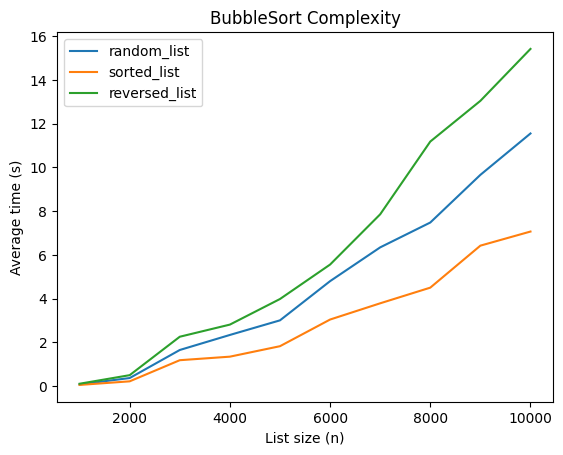

In [148]:
samples = 10
jump = 1000
sizes = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [BubbleSort]
scenery = [random_list, sorted_list, reversed_list]
MachineCall(sizes, reps, algorithm, scenery)

### Analysis
- The best scenario (sorted list) exhibits quadratic growth. This scenario never executes the conditional block, although the iterative part continues to be read.
- The worst scenario (descending sorted list) exhibits quadratic growth. This scenario always executes the conditional block while the iterative part continues to be read.
- The average scenario (random list) exhibits quadratic growth. This scenario combines the characteristics of the other two scenarios.

## InsertionSort BigOh Visualization

Graph saved to: ..\img\InsertionSort_complexity.png


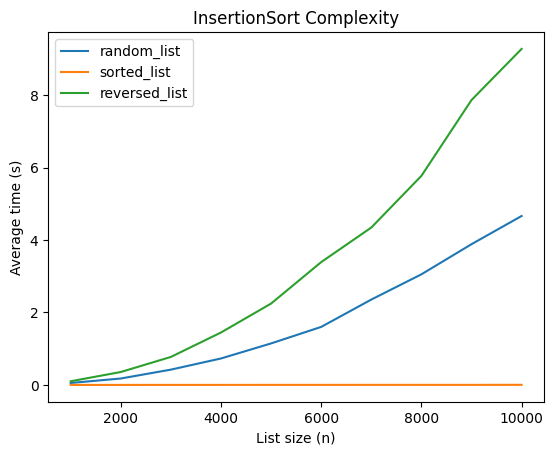

In [149]:
samples = 10
jump = 1000
sizes = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [InsertionSort]
scenery = [random_list, sorted_list, reversed_list]
MachineCall(sizes, reps, algorithm, scenery)

### Analysis
- The best scenario (sorted list) exhibits linear growth. This scenario never executes the conditional block, which breaks the iterative cycle.
- The worst scenario (descending sorted list) exhibits quadratic growth. This scenario always executes the conditional block, so the iterative part continues.
- The average scenario (random list) exhibits quadratic growth. This scenario combines the characteristics of the other two.

## SelectionSort BigOh Visualization

Graph saved to: ..\img\SelectionSort_complexity.png


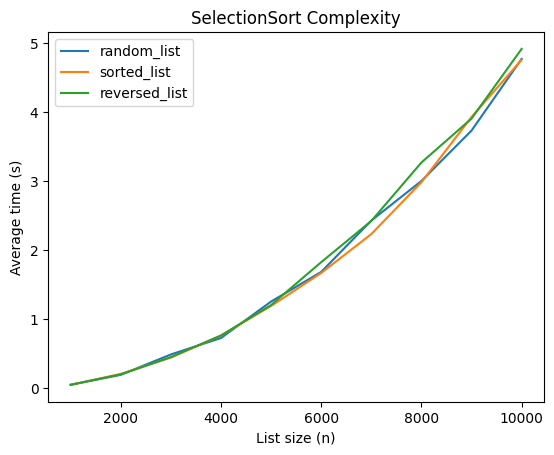

In [150]:
samples = 10
jump = 1000
sizes = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [SelectionSort]
scenery = [random_list, sorted_list, reversed_list]
MachineCall(sizes, reps, algorithm, scenery)

### Analysis
The three scenarios show quadratic behavior without relevant differences.
## MergeSort BigOh Visualization

Graph saved to: ..\img\MergeSort_complexity.png


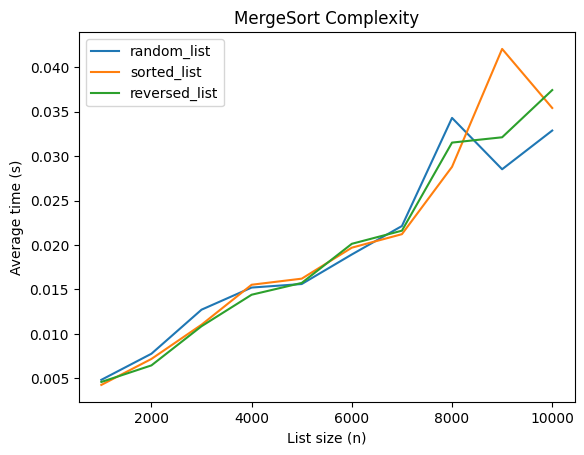

In [151]:
samples = 10
jump = 1000
sizes = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [MergeSort]
scenery = [random_list, sorted_list, reversed_list]
MachineCall(sizes, reps, algorithm, scenery)

### Analysis
The three scenarios show a smooth increasing behavior, as does $n\lg n$. There is no relevant difference between the three scenarios.
## HeapSort BigOh Visualization

Graph saved to: ..\img\HeapSort_complexity.png


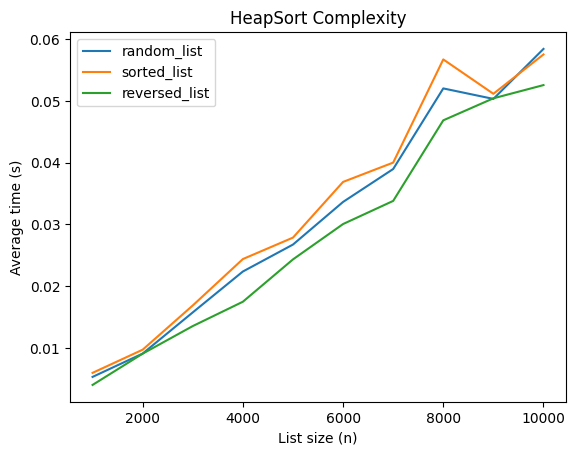

In [152]:
samples = 10
jump = 1000
sizes = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [HeapSort]
scenery = [random_list, sorted_list, reversed_list]
MachineCall(sizes, reps, algorithm, scenery)

### Analysis
The three scenarios show a smooth increasing behavior, as does $n\lg n$. There is no relevant difference between the three scenarios.
## QuickSort BigOh Visualization

Graph saved to: ..\img\QuickSort_complexity.png


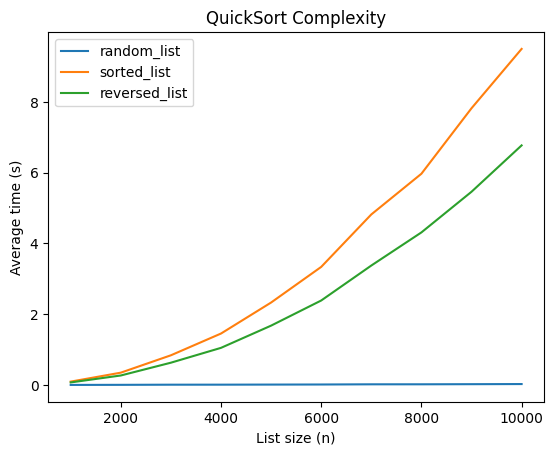

In [153]:
samples = 10
jump = 1000
sizes = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [QuickSort]
scenery = [random_list, sorted_list, reversed_list]
MachineCall(sizes, reps, algorithm, scenery)

### Analysis
- The best scenario (random list) shows very smooth growth, as does $n \lg n$.
- The worst scenario (sorted list and descending sorted list) shows quadratic growth, due to how the pivot was assigned (we'll see how to improve this assignment in another work).
## Comparing Algorithms with Sorted Lists

Graph saved to: ..\img\sorted_list_comparison.png


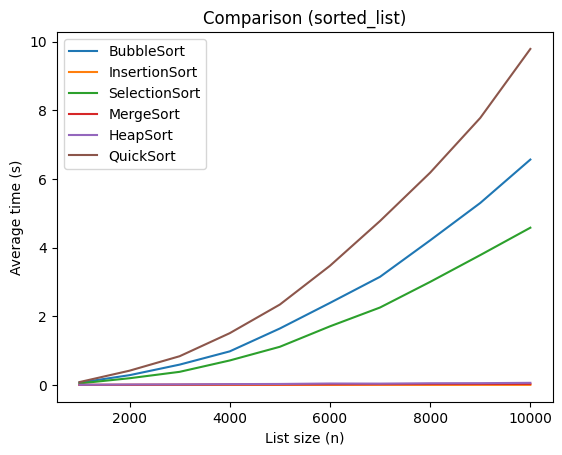

In [154]:
samples = 10
jump = 1000
sizes = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [BubbleSort, InsertionSort, SelectionSort, MergeSort, HeapSort, QuickSort]
scenery = [sorted_list]
MachineCall(sizes, reps, algorithm, scenery)

### Analysis
There's a significant difference between quadratic complexity algorithms (`QuickSort`, `BubbleSort`, `Selection`) and those with lower complexity. Note that the `QuickSort` algorithm is in its worst-case scenario, which is why its runtime is so long, even longer than `BubbleSort` algorithm.
## A Closer Look
Here's a closer look at the `InsertionSort`, `MergeSort`, and `HeapSort` algorithms.

Graph saved to: ..\img\sorted_list_comparison.png


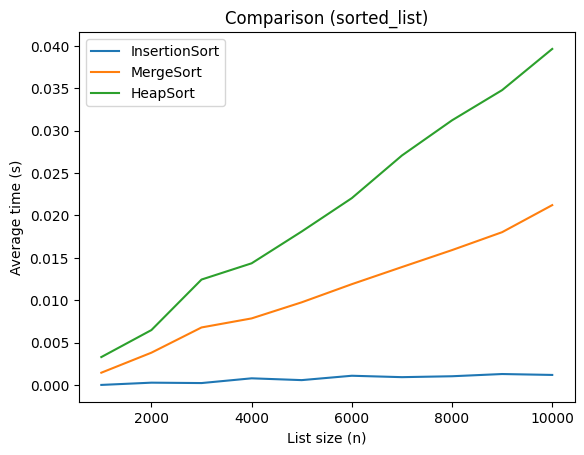

In [160]:
samples = 10
jump = 1000
sizes = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [InsertionSort, MergeSort, HeapSort]
scenery = [sorted_list]
MachineCall(sizes, reps, algorithm, scenery)

### Analysis
The linear complexity of `InsertionSort` is evident, being the fastest for this scenario (complexity $n$). The other two algorithms have complexity $n \lg n$. `MergeSort` is faster than `HeapSort`.
## Comparing Algorithms with Reversed Sorted Lists

Graph saved to: ..\img\reversed_list_comparison.png


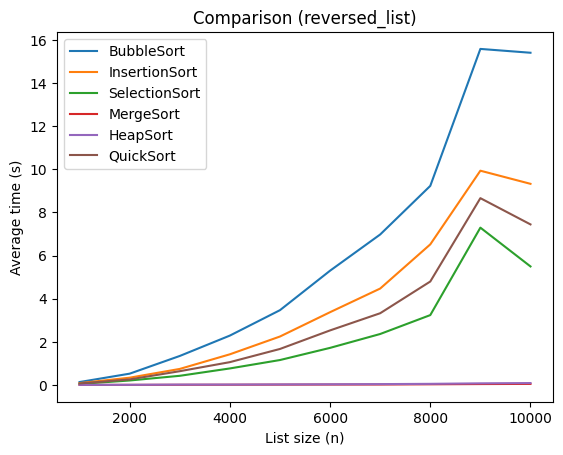

In [156]:
samples = 10
jump = 1000
sizes = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [BubbleSort, InsertionSort, SelectionSort, MergeSort, HeapSort, QuickSort]
scenery = [reversed_list]
MachineCall(sizes, reps, algorithm, scenery)

### Analysis
There's a significant difference between quadratic complexity algorithms (`BubbleSort`, `InsertionSort`, `QuickSort`, `SelectionSort`) and those with lower complexity. The algorithm `BubbleSort` has the longest execution time. Note that the `QuickSort` algorithm is in its worst-case scenario, which is why its runtime is so long.
## A Closer Look
Here's a closer look at the `MergeSort` and `HeapSort` algorithms.

Graph saved to: ..\img\reversed_list_comparison.png


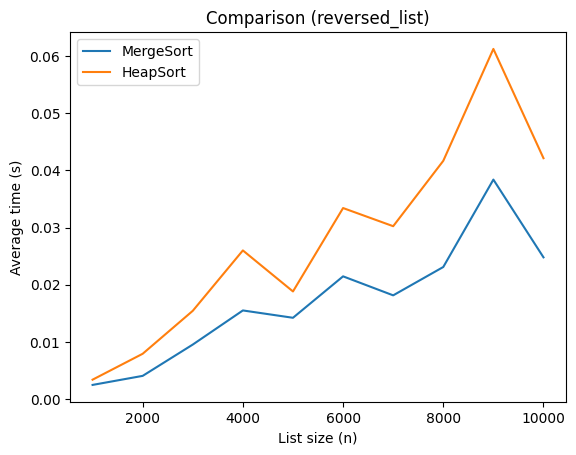

In [158]:
samples = 10
jump = 1000
sizes = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [MergeSort, HeapSort]
scenery = [reversed_list]
MachineCall(sizes, reps, algorithm, scenery)

### Analysis
Both algorithms have complexity $n \lg n$. `MergeSort` is faster than `HeapSort`.
## Comparing Algorithms with Random Lists

Graph saved to: ..\img\random_list_comparison.png


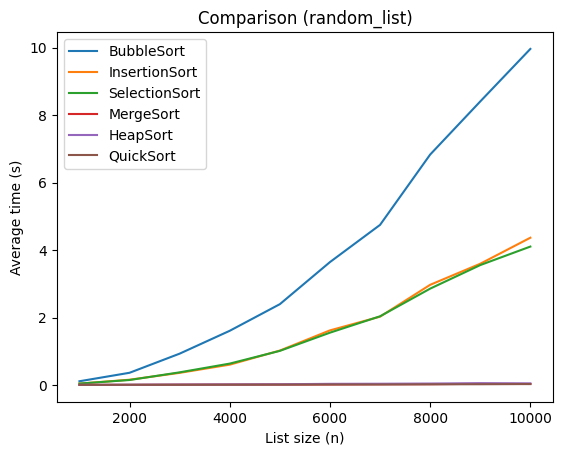

In [157]:
samples = 10
jump = 1000
sizes = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [BubbleSort, InsertionSort, SelectionSort, MergeSort, HeapSort, QuickSort]
scenery = [random_list]
MachineCall(sizes, reps, algorithm, scenery)

### Analysis
There's a significant difference between quadratic complexity algorithms (`BubbleSort`, `InsertionSort`, `SelectionSort`) and those with lower complexity. The algorithm `BubbleSort` has the longest execution time.
## A Closer Look
Here's a closer look at the `MergeSort`, `HeapSort`, and `QuickSort` algorithms.

Graph saved to: ..\img\random_list_comparison.png


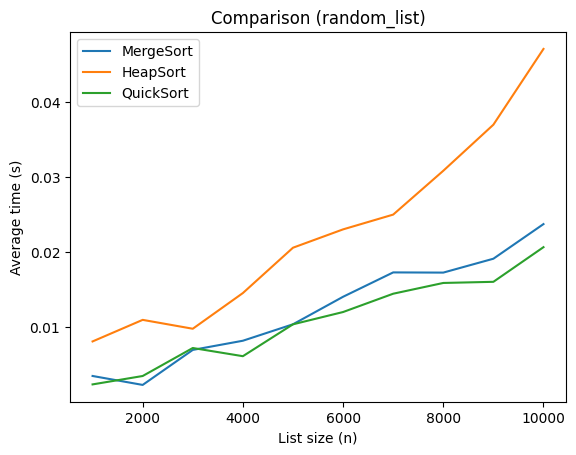

In [159]:
samples = 10
jump = 1000
sizes = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [MergeSort, HeapSort, QuickSort]
scenery = [random_list]
MachineCall(sizes, reps, algorithm, scenery)

### Analysis
All algorithms have complexity $n \lg n$. The algorithms `QuickSort` and `MergeSort` are the fastest ones.
# Conclusions
In this study, we experimentally validated the theoretical time complexities of various sorting algorithms. We also compared their performance across different input scenarios. Since data in real-world applications is typically unordered, the average-case performance is often the most relevant. Under these conditions, QuickSort and MergeSort consistently emerged as the fastest algorithms, achieving an average execution time of approximately 0.02 seconds for lists containing 10,000 elements.

On the other hand, BubbleSort, InsertionSort, and SelectionSort demonstrated significantly slower runtimes in all test cases, aligning with their known quadratic time complexity. HeapSort, while slightly slower than QuickSort and MergeSort, still maintained excellent average performance and is widely appreciated not only as a sorting algorithm but also as a foundational data structure for implementing efficient priority queues—an aspect we plan to explore further in future work.